In [10]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

0.40374495808625677


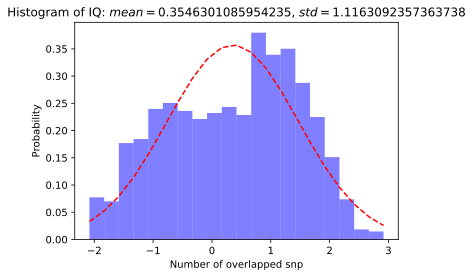

KstestResult(statistic=0.21103782621035483, pvalue=0.0)
0.6553503767484903


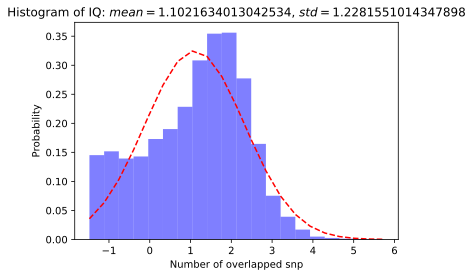

KstestResult(statistic=0.4312208914132161, pvalue=0.0)


In [29]:
os.chdir("/data5/galaxy/project/p-value/fig2")
df = pd.read_table("data_forplot", sep="\t")
# print(df.head())
df_dmr = df[(df["Organ"] == "Muscle") & (df["Type"] == "DMR")]
df_com = df[(df["Organ"] == "Muscle") & (df["Type"] == "Common")]
#
# dmr = np.log(df_dmr["value"])
# dmr = np.sqrt(3, df_dmr["value"])
# dmr = np.power(df_dmr["value"], 1/3)
dmr, dmr_lambda = stats.boxcox(df_dmr["value"])
print(dmr_lambda)
plot_histogram(dmr)
ks_test(dmr)
#
# com = np.log(df_com["value"])
# com = np.sqrt(df_com["value"])
# com = np.power(df_com["value"], 1/3)
com, com_lambda = stats.boxcox(df_com["value"])
print(com_lambda)
plot_histogram(com)
ks_test(com)

In [17]:
def plot_histogram(data_list):
    num_bins, mean, std = 20, np.mean(data_list), np.std(data_list)
    n, bins, patches = plt.hist(data_list, num_bins, density=True, facecolor="blue", alpha=0.5)
    y = stats.norm.pdf(bins, mean, std)
    plt.plot(bins, y, "r--")
    plt.xlabel("Number of overlapped snp")
    plt.ylabel("Probability")
    plt.title(r"Histogram of IQ: $mean=%s$, $std=%s$" % (str(mean), str(std)))
    plt.subplots_adjust(left=0.15)
    plt.show()

In [2]:
def ks_test(data_list):
    print(stats.kstest(data_list, cdf="norm"))